In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import time
import sys
import tensorflow as tf
from random import randint


# read mask

(480, 640, 3)


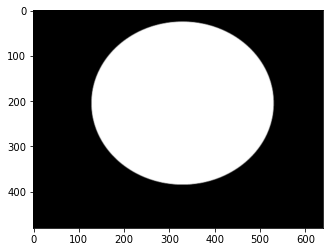

In [114]:
mask = np.array(cv2.imread('mask.png'))/255
print(mask.shape)
plt.imshow(mask,plt.cm.gray)

# read file for `white` picture

In [3]:
def read_while_file():
    print("reading data of white...")
    file_path='d:/Special_topic/pleurotus_eryngii/white/*'
    file_name = glob.glob(file_path)
    file_num = len(file_name)

    data = np.array(file_num*[480*[640*[3*[None]]]])

    for i in range(file_num):
        data[i] = cv2.imread(file_name[i]) * mask

    ## plot image for white data
    # data = data.astype('uint8')
    # plt.figure(figsize=(10,5))
    # for i in range(file_num):
    #     plt.subplot(3,3,i+1)
    #     plt.axis("off")
    #     plt.title(file_name[i])
    #     plt.imshow(cv2.cvtColor(data[i], cv2.COLOR_BGR2RGB))
    # plt.show()

    print("reading data of white sucessful\n")
    return data


white_data = read_while_file()


reading data of white...


reading data of white sucessful



# read file for `data` picture

In [4]:
# read file path
# file path 1030 1104 1108 1118 1122
file_path='d:/Special_topic/pleurotus_eryngii/*'
folder_name = glob.glob(file_path)[:5]
file_name=[]
for folder_name in folder_name:
    for fname in glob.glob(folder_name+"/*"):
        file_name.append(fname)
print(len(file_name))
print(len(file_name)//9)
print(file_name[0])
print(file_name[-1])


1296
144
d:/Special_topic/pleurotus_eryngii\1030\20191122_093418_dark_30.png
d:/Special_topic/pleurotus_eryngii\1122\20191122_105852_LED6.png


In [5]:
def read_data_file():
    print("reading data....")

    ## read file path
    ## file path 1030 1104 1108 1118 1122
    file_path='d:/Special_topic/pleurotus_eryngii/*'
    folder_name = glob.glob(file_path)[:5]
    file_name=[]
    for folder_name in folder_name:
        for fname in glob.glob(folder_name+"/*"):
            file_name.append(fname)
    data_Gnum = 3 #len(file_name)//9
    print("data_Gnum = ", data_Gnum)

    ## [data_Gnum][NumOfPicture][picture(480*640*wave)]
    data_black = np.array(data_Gnum*[480*[640*[9* [None]]]])
    data       = np.array(data_Gnum*[480*[640*[18*[None]]]])
    print("data_black.shpae = ",data_black.shape)
    print("data.shpae = ",data.shape)

    print("processing group")
    for group in range(data_Gnum):
        print("{}/{}".format(group+1,data_Gnum),end="\t")

        for black in range(3):
            data_black[group][:,:,black*3:black*3+3] = cv2.imread(file_name[group*9+black]) * mask

        for LED in range(6):
            data[group][:,:,LED*3:LED*3+3] = cv2.imread(file_name[group*9+3+LED]) * mask

    print("\nreading data sucessful\n")
    return data, data_black, data_Gnum

#=========================================================
data, data_black, data_Gnum = read_data_file()


reading data....
data_Gnum =  3


data_black.shpae =  (3, 480, 640, 9)
data.shpae =  (3, 480, 640, 18)
processing group
1/3	

2/3	

3/3	


reading data sucessful



In [6]:
# solve div0 question

# def div0( a, b ):
#     """ ignore / 0, div0( [-1, 0, 1], 0 ) -> [0, 0, 0] """
#     with np.errstate(divide='ignore', invalid='ignore'):
#         c = np.divide(a,b)
#         c[ ~ np.isfinite( c )] = 0  # -inf inf NaN
#     return c

def div0(a,b):
    b[b==0] = -1
    c = a/b
    c[c<0] = 0
    return c

def print_info(img):
    print("max =",np.amax(img))
    print("min =",np.amin(img))
    print("mean=",np.mean(img))

a = np.array([1.,0.,0.], dtype='float')
b = np.array([0.,1.,0.], dtype='float')
c = div0(a,b)
print(div0(a,b))

[ 0.  0. -0.]


# calculate reflectivity

In [7]:
## initialization
# [data_Gnum][NumOfPicture(LED)][picture(480*640*3)]
reflectivity = np.zeros_like(data, dtype='float')
print("reflectivity.shape=", reflectivity.shape)
white_data = white_data.astype('float')
data = data.astype('float')
print()

dark_30 = white_data[2]
dark_40 = white_data[0]
dark_100= white_data[1]
# print("dark_100.shape=",dark_100.shape)

LED1_white = white_data[3]
LED2_white = white_data[4]
LED3_white = white_data[5]
LED4_white = white_data[5]
LED5_white = white_data[7]
LED6_white = white_data[8]
# print("LED6_white.shape=",LED6_whdef array_divide(a,b):


print(type(dark_30[0][0][0]))


reflectivity.shape= (3, 480, 640, 18)



<class 'numpy.float64'>


In [8]:
for Gnum in range(data_Gnum):
    LED = np.array(6*[480*[640*[3*[None]]]])
    for i in range(6):
        LED[i] = data[Gnum][:,:,i*3:i*3+3]

    reflectivity[Gnum][:,:,0:3]   = div0((LED[0]-dark_40) , (LED1_white-dark_40))
    reflectivity[Gnum][:,:,3:6]   = div0((LED[1]-dark_30) , (LED2_white-dark_30))
    reflectivity[Gnum][:,:,6:9]   = div0((LED[2]-dark_30) , (LED3_white-dark_30))
    reflectivity[Gnum][:,:,9:12]  = div0((LED[3]-dark_30) , (LED4_white-dark_30))
    reflectivity[Gnum][:,:,12:15] = div0((LED[4]-dark_30) , (LED5_white-dark_30))
    reflectivity[Gnum][:,:,15:]   = div0((LED[5]-dark_100), (LED6_white-dark_100))

    # temp1 = (LED1-dark_30)
    # temp2 = LED1_white-dark_30
    # temp3 = div0(temp1,temp2)

    # temp3[temp3<0] = 0
    # temp3[temp3>1] = 1

    print("processing group {} ...".format(Gnum))

reflectivity[reflectivity<0] = 0
reflectivity[reflectivity>1] = 1
print("process sucessful\n")


processing group 0 ...


processing group 1 ...


processing group 2 ...
process sucessful



 group 0 ==================================


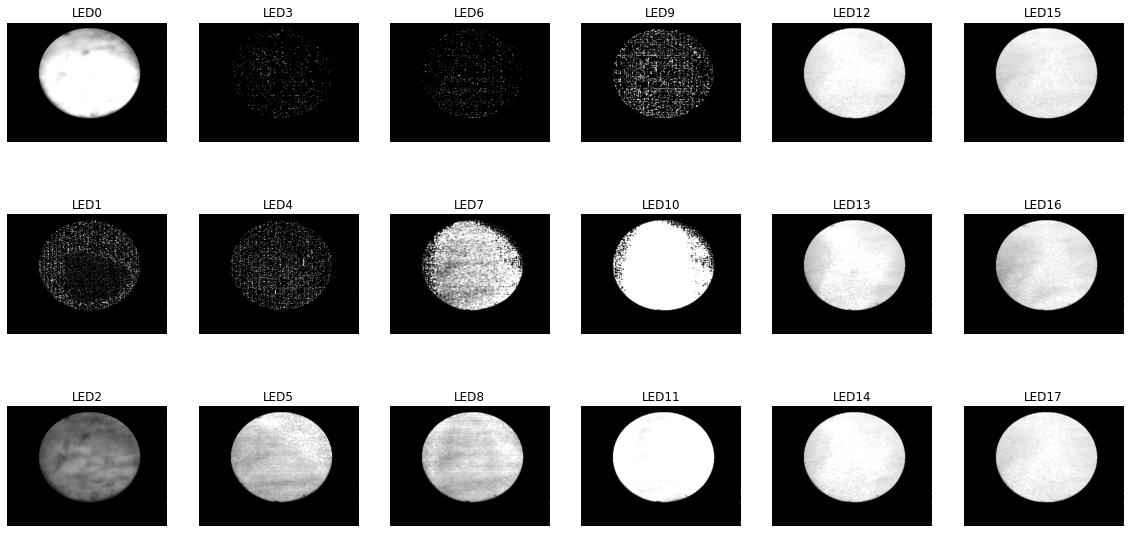

 group 1 ==================================


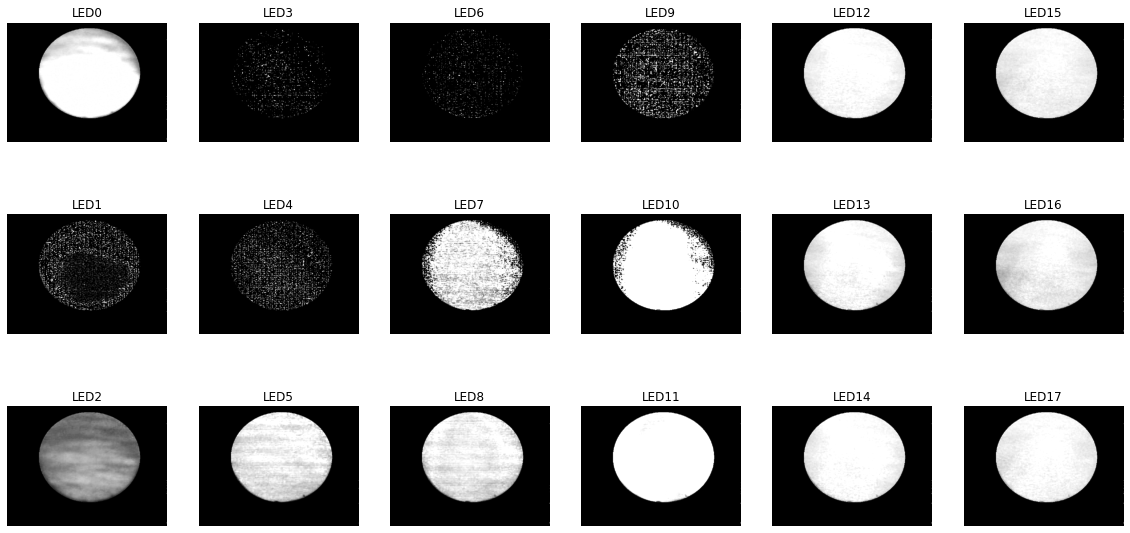

 group 2 ==================================


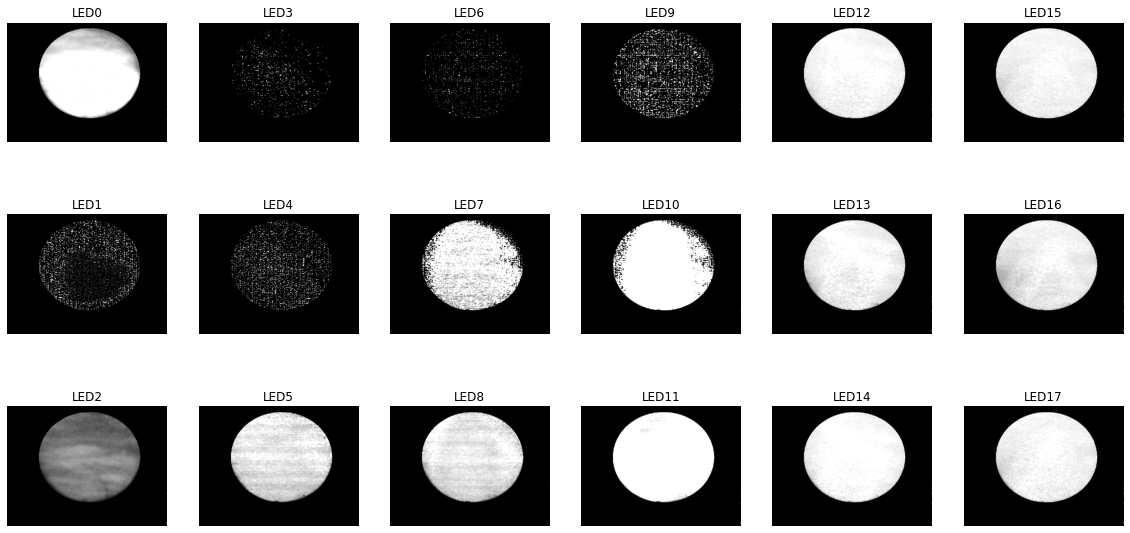

In [9]:
def set_figure_size():
    plt.figure(figsize=(20,10))

# [data_Gnum][NumOfPicture(LED)][picture(480*640*3)]
for Gnum in range(data_Gnum):
    print(" group {} ==================================".format(Gnum))

    set_figure_size()
    figure_index = 0
    for col in range(6):
        for row in range(3):
            plt.subplot(3,6,col+1+row*6)
            plt.axis("off")
            plt.title("LED{}".format(figure_index))
            plt.imshow(reflectivity[Gnum][:,:,figure_index], plt.cm.gray, vmax=1.0)
            figure_index += 1
    plt.show()


# del data witch we don't want

 group 0 ==================================


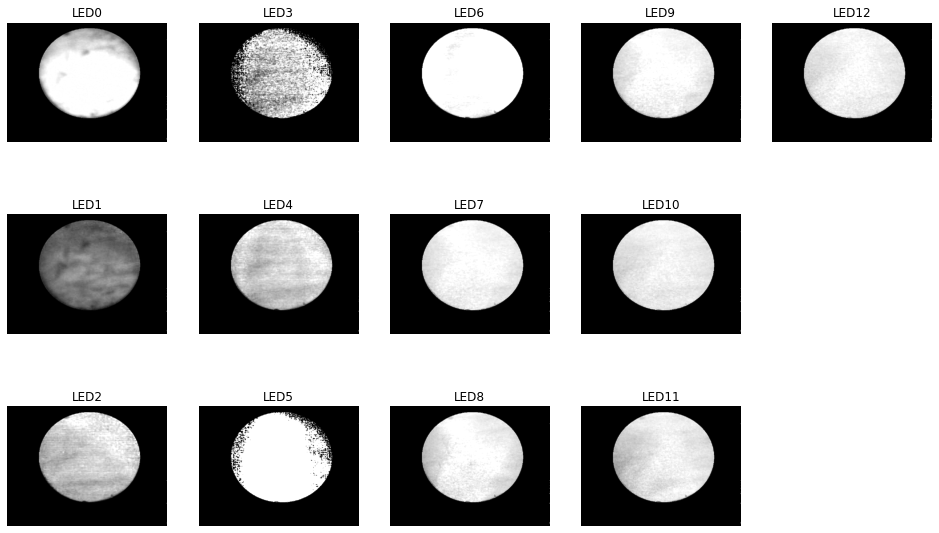

In [10]:
reflectivity_process = reflectivity
reflectivity_process = np.delete(reflectivity_process,9,3)
reflectivity_process = np.delete(reflectivity_process,6,3)
reflectivity_process = np.delete(reflectivity_process,4,3)
reflectivity_process = np.delete(reflectivity_process,3,3)
reflectivity_process = np.delete(reflectivity_process,1,3)

def set_figure_size():
    plt.figure(figsize=(20,10))

# [data_Gnum][NumOfPicture(LED)][picture(480*640*3)]
for Gnum in range(data_Gnum):
    if(Gnum==1):
        break

    print(" group {} ==================================".format(Gnum))
    set_figure_size()
    figure_index = 0
    for col in range(6):
        for row in range(3):
            if(figure_index==13):
                break
            plt.subplot(3,6,col+1+row*6)
            plt.axis("off")
            plt.title("LED{}".format(figure_index))
            plt.imshow(reflectivity_process[Gnum][:,:,figure_index], plt.cm.gray, vmax=1.0)
            figure_index += 1
    plt.show()


# OSP

In [11]:
def rho(arr):
    sum=0
    for i in arr:
        sum += i**2
    r = sum**0.5
    return r


def OSPfn(M, U):
    (l, p) = M.shape
    P_U = np.identity(l) - U.dot(np.linalg.pinv(U));
    nu = np.zeros((p,1))
    for i in range(p):
        nu[i] = rho(P_U.dot(M[:,i]))
    return nu


In [12]:
# change reflectivity_process([group][image*image][band]) to
#        osp_process([group][band][image*image])
cube_arr = reflectivity_process
(group, x ,y ,band) = cube_arr.shape
cube_arr = cube_arr.transpose(0,3,1,2).reshape(group, band, x*y)
(group, band , img_p) = cube_arr.shape #img_p = number of image pixel
print(cube_arr.shape)

(3, 13, 307200)


In [102]:
# select undesired or interfering signatures
u1 = reflectivity_process[0,177,170,:]
u2 = reflectivity_process[0,89 ,265,:]
u3 = reflectivity_process[0,86 ,285,:]
U = np.stack((u1,u2,u3), axis=1)
# print("U =", U)
# print("U.shpae = ", U.shape)
# print("cube_arr.shpae = ", cube_arr.shape)

out = OSPfn(cube_arr[0], U).reshape((480,640))
out[out>=threshold] = 1
out[out<threshold] = 0
